<a href="https://colab.research.google.com/github/MohamedSelim-dev/hotel_satisfication_perdiction/blob/main/hotel_satisfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1-Load data

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path
path = "/content/drive/MyDrive/mlprojects/Hotel_Satisfaction_Score.csv"
df = pd.read_csv(path)
df.head(10)

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
5,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied
6,82113,Male,47,academic,Personal Travel,Individual/Couple,2,4,2,3,2,2,2,3,5,2,neutral or dissatisfied
7,96462,Female,52,aviation,Group Travel,Group bookings,4,3,4,4,5,5,5,4,5,4,satisfied
8,79485,Female,41,tourism,Group Travel,Group bookings,1,2,2,2,4,3,1,4,1,2,neutral or dissatisfied
9,65725,Male,20,academic,Group Travel,Individual/Couple,3,3,3,4,2,3,2,4,3,2,neutral or dissatisfied


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'purpose_of_travel', 'Type of Travel',
       'Type Of Booking', 'Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction'],
      dtype='object')

# 2-EDA

In [ ]:
df.shape

(103904, 17)

# 2.1-Check missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [ ]:
#drop id column
df.drop('id',axis=1,inplace=True)

In [ ]:
df.isna().sum()

Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [ ]:
df['Type Of Booking'].value_counts()

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64

**Data** that is not defined is 7494 or about 5% - 7%.We can drop the data because the percentage is small or handel it.

In [ ]:
df = df.replace(['Not defined'], np.nan)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Type Of Booking'].value_counts()

Group bookings       49665
Individual/Couple    46745
Name: Type Of Booking, dtype: int64

In [ ]:
df.shape

(96410, 16)

In [231]:
df.describe()

,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,age_type,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple
count,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000,96410.000000
mean,1.506016,39.436075,2.726709,3.048076,2.764278,2.977606,3.208308,3.459268,3.374982,3.326605,3.660015,3.298444,1.552111,2.417052,0.133617,0.204087,0.091484,0.308505,0.297116,0.484856
std,0.499966,14.990748,1.330894,1.527823,1.400783,1.279701,1.327094,1.315574,1.329913,1.258224,1.172602,1.308924,0.497280,0.624812,0.340242,0.403035,0.288298,0.461879,0.456991,0.499773
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2.2- Check Outlier

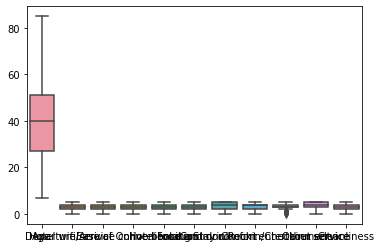

In [ ]:
sns.boxplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


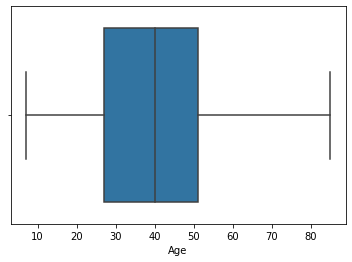

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


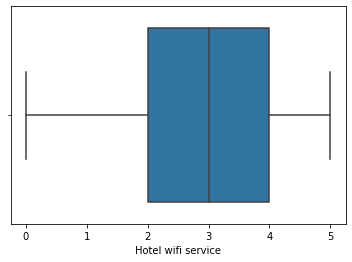

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


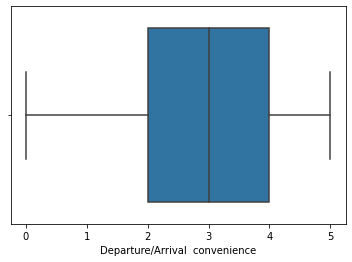

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


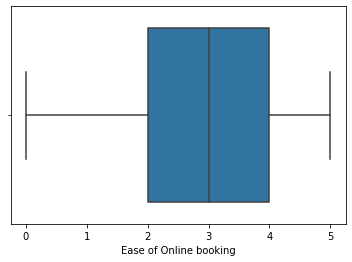

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


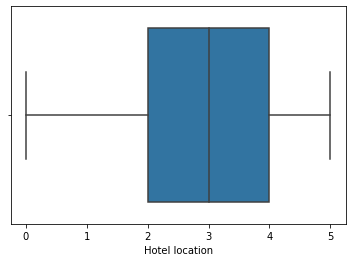

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


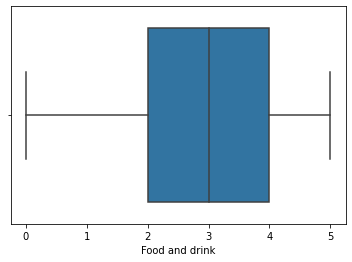

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


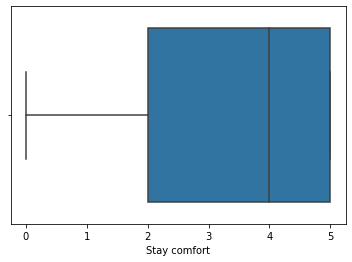

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


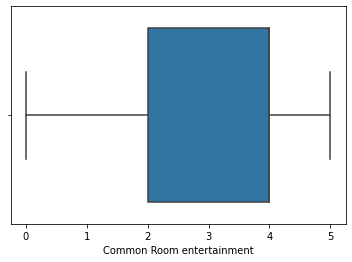

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


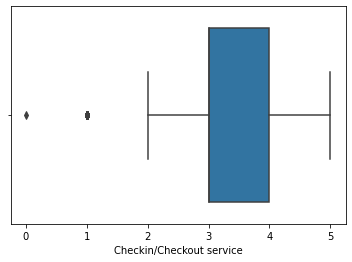

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


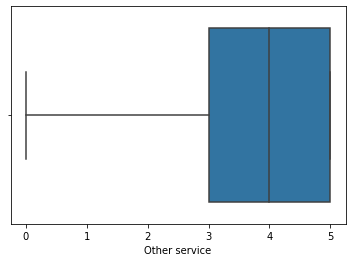

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


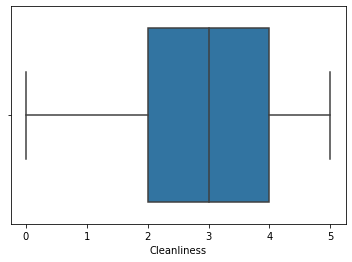

In [ ]:
numierc_columns=df.select_dtypes(include=np.number).columns.tolist()

for col in numierc_columns:
   sns.boxplot(df[col])
   plt.show()

Only outliers in the checkin/checkout column which are also small in number with a scale of 0-5.

# Check Class target if imbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


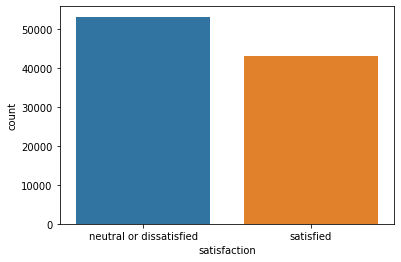

In [ ]:
sns.countplot(df['satisfaction'])

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    53229
satisfied                  43181
Name: satisfaction, dtype: int64

**the distribution of data show that there is an imbalanced data**

# 2.3- Categorical data

1- Gender.

2- Porpose_of_travel.

3- Type_of_Travel.

4- Type_of_Booking.


## Gender

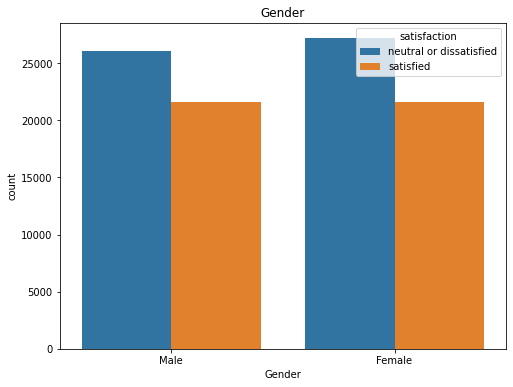

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Gender')
sns.countplot(data=df, x='Gender', hue='satisfaction')

## Porpose_of_travel

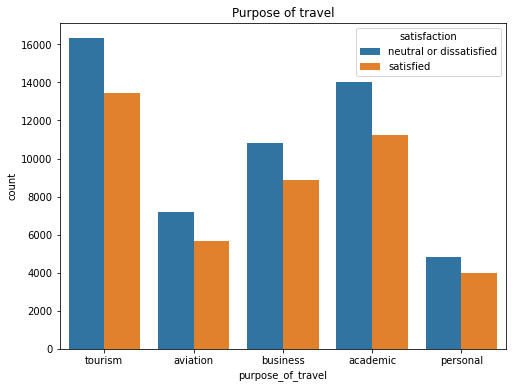

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Purpose of travel')
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction')

## Type_of_Travel

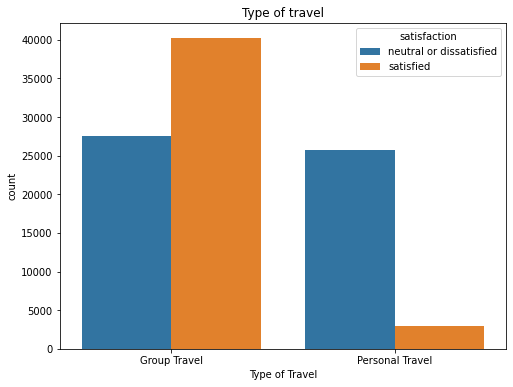

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Type of travel')
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')

## Type_of_Booking

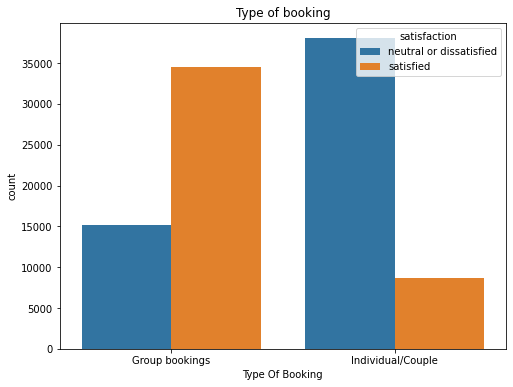

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Type of booking')
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction')

# 2.4- Numeric data

## age

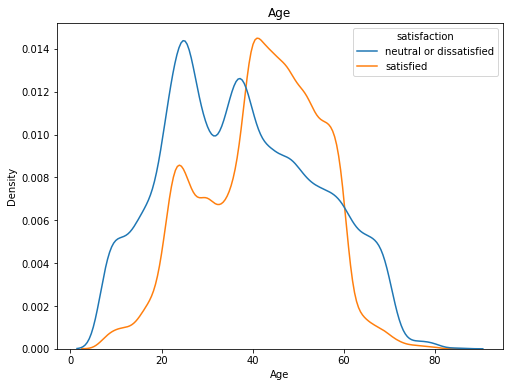

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Age')
sns.kdeplot(data=df, x='Age', hue='satisfaction')

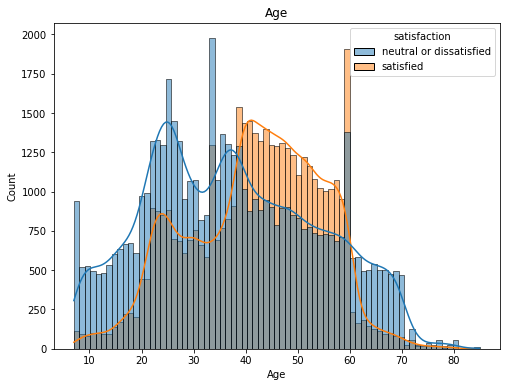

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Age')
sns.histplot(data=df , x='Age',kde=True,hue=df['satisfaction'])

the highest level of satisfaction is in the range of 40-60 while under the age of 40 the average level of satisfaction is dissatisfied and also over the age of 60 feel dissatisfied.

## age type

In [ ]:
def age_type(age):
  if age < 40:
    return 'Young'
  elif age > 60:
    return 'Old'
  else:
    return 'Mid-Old' 

df['age_type']= df['Age'].apply(lambda age: age_type(age))

In [ ]:
df.head()

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,age_type
1,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied,Young
2,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied,Young
3,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied,Young
4,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied,Old
5,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied,Young


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


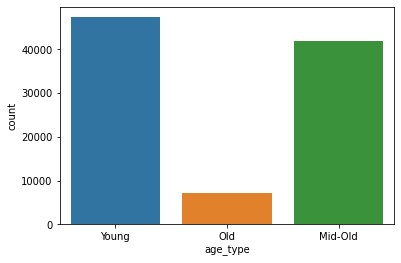

In [ ]:
sns.countplot(df['age_type'])

In [ ]:
df['age_type'].value_counts()

Young      47307
Mid-Old    42004
Old         7099
Name: age_type, dtype: int64

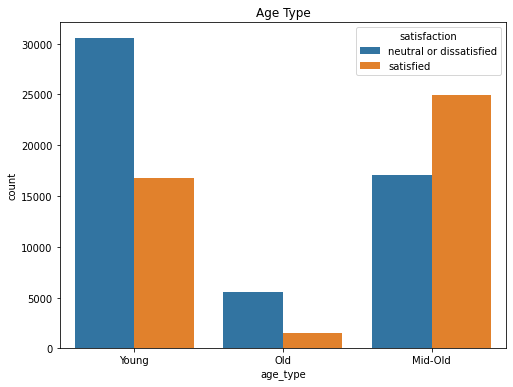

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Age Type')
sns.countplot(data=df, x='age_type', hue='satisfaction')

In [ ]:
#all data without 'mid-old' age type will focuse on increace their satisfiy
df_not_midold = df[df['age_type'] != 'Mid-Old']
df_not_midold.shape

(54406, 17)

## age-type and wifi service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


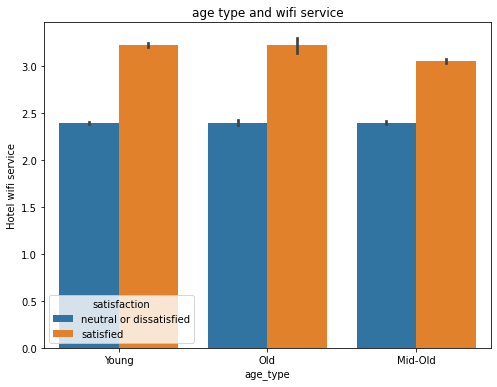

In [ ]:
plt.figure(figsize=[8,6])
plt.title('age type and wifi service')
sns.barplot(df['age_type'], df['Hotel wifi service'], hue=df['satisfaction'])

## age-type and entertainment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


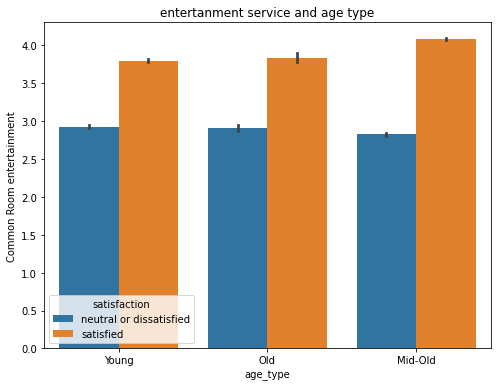

In [ ]:
plt.figure(figsize=[8,6])
plt.title('entertanment service and age type')
sns.barplot(df['age_type'], df['Common Room entertainment'], hue=df['satisfaction'])

## age type and comfort

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


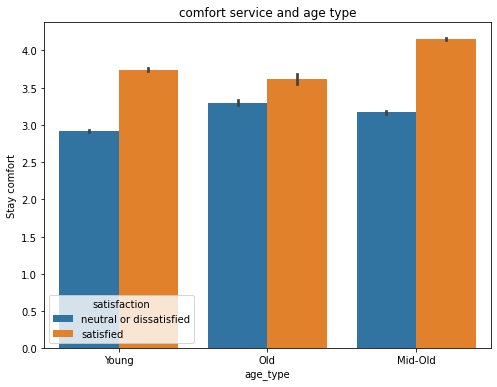

In [ ]:
plt.figure(figsize=[8,6])
plt.title('comfort service and age type')
sns.barplot(df['age_type'], df['Stay comfort'], hue=df['satisfaction'])

## age type and food/drink

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


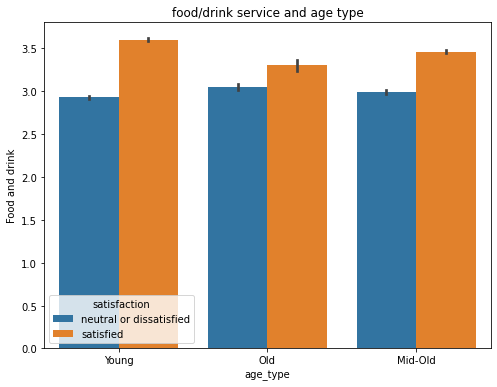

In [ ]:
plt.figure(figsize=[8,6])
plt.title('food/drink service and age type')
sns.barplot(df['age_type'], df['Food and drink'], hue=df['satisfaction'])

## age type and cleanliness

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


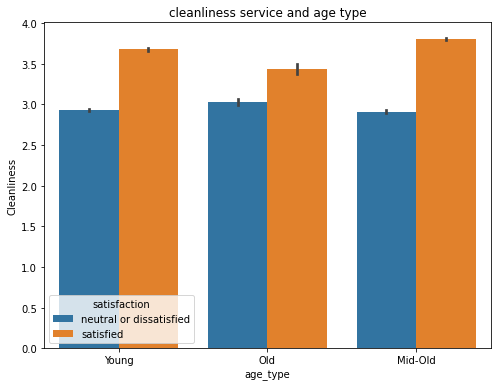

In [ ]:
plt.figure(figsize=[8,6])
plt.title('cleanliness service and age type')
sns.barplot(df['age_type'], df['Cleanliness'], hue=df['satisfaction'])

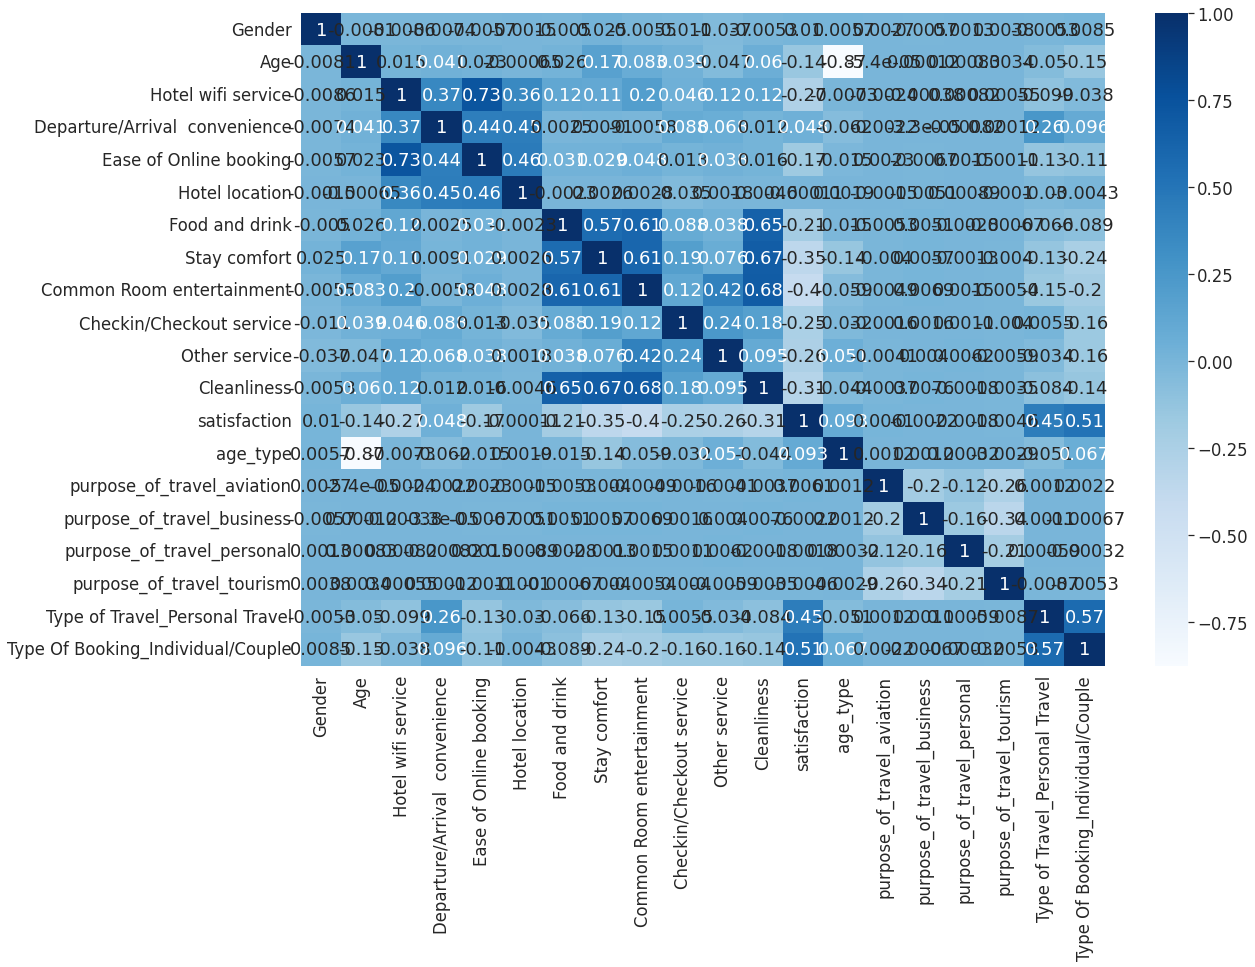

In [236]:
#sns.heatmap(df.corr(),annot=True)

corr_matrix = df.corr()

plt.figure(figsize=(18,12))
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix, annot=True, cmap='Blues' )

# 2.5 Answer Questions

### Q1-What are the ages of customers who are not satisfied with the services provided?

### the highest level of satisfaction is in the range of 40-60 while under the age of 40 the average level of satisfaction is dissatisfied and also over the age of 60 feel dissatisfied.


### Q2-What is the gender of customers who are not satisfied with the service?


### The number of Satisfied and Dissatisfied is almost the same.


### Q3-what is the most important variable that makes customers satisfied?


### food and drink , wifi , entertainment


### Q4-Do customers coming with groups give a lower score on the service satisfaction scale?

### the customer comes personal give a lower score than comes in groups


### Q5-Does tourism customer satisfaction increase from business customers?

### the number of tourism customers satisfied more than business customers.



# 2.6 handel categorical data

# 2.6.1 Label ecoding

Gender

age_group

satisfaction

In [ ]:
df['Gender'].value_counts()

Female    48785
Male      47625
Name: Gender, dtype: int64

In [ ]:
encoder = {'Male':1,'Female':2}

In [ ]:
df['Gender'] = df['Gender'].map(encoder)

In [ ]:
df['age_type'].value_counts()

Young      47307
Mid-Old    42004
Old         7099
Name: age_type, dtype: int64

In [ ]:
encoder = {'Old':1 ,'Mid-Old':2,'Young':3}

In [ ]:
df['age_type'] =df['age_type'].map(encoder)

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    53229
satisfied                  43181
Name: satisfaction, dtype: int64

In [ ]:
encoder = {'satisfied':1,'neutral or dissatisfied':2}

In [ ]:
df['satisfaction']=df['satisfaction'].map(encoder)

# 2.6.2 One_hot encoder

purpose_of_travel

Type of Travel

Type Of Booking

In [ ]:
df = pd.get_dummies(data=df,columns=['purpose_of_travel','Type of Travel','Type Of Booking'],drop_first=True)

In [ ]:
df.head()

,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,age_type,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple
1,1,25,3,2,3,3,1,1,1,1,4,1,2,3,0,0,0,1,0,0
2,2,26,2,2,2,2,5,5,5,4,4,5,1,3,0,0,0,1,0,0
3,2,25,2,5,5,5,2,2,2,1,4,2,2,3,0,0,0,1,0,0
4,1,61,3,3,3,3,4,5,3,3,3,3,1,1,1,0,0,0,0,0
5,2,26,3,4,2,1,1,1,1,4,4,1,2,3,0,1,0,0,1,1


# 3 Split data input / output

In [ ]:
X =df.drop('satisfaction',axis=1)
y=df['satisfaction']

# 4 split train & test


In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train.value_counts()

2    42583
1    34545
Name: satisfaction, dtype: int64

In [ ]:
y_test.value_counts()

2    10646
1     8636
Name: satisfaction, dtype: int64

# 5 handel imbalanced 

## SMOTE

In [ ]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [ ]:
x_train_smote

,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,age_type,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple
0,1,11,5,4,5,5,5,5,5,5,5,5,3,1,0,0,0,0,0
1,1,66,1,2,1,4,4,4,4,2,3,4,1,1,0,0,0,1,1
2,1,38,3,3,3,5,4,4,4,5,4,4,3,1,0,0,0,0,0
3,1,39,0,0,0,2,4,5,4,5,4,3,3,0,0,0,1,0,0
4,1,28,3,3,3,3,4,4,4,5,5,4,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85161,1,31,4,4,4,4,4,4,4,3,5,4,3,0,0,0,0,0,0
85162,2,30,5,5,5,5,4,4,4,4,1,4,3,0,1,0,0,0,0
85163,1,27,3,3,4,3,3,3,3,4,4,3,3,0,0,1,0,0,0
85164,1,55,2,2,2,2,2,5,4,5,4,4,2,0,0,0,0,0,0


In [ ]:
y_train_smote.value_counts()

1    42583
2    42583
Name: satisfaction, dtype: int64

In [ ]:
x_train_smote.duplicated().sum()

3620

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


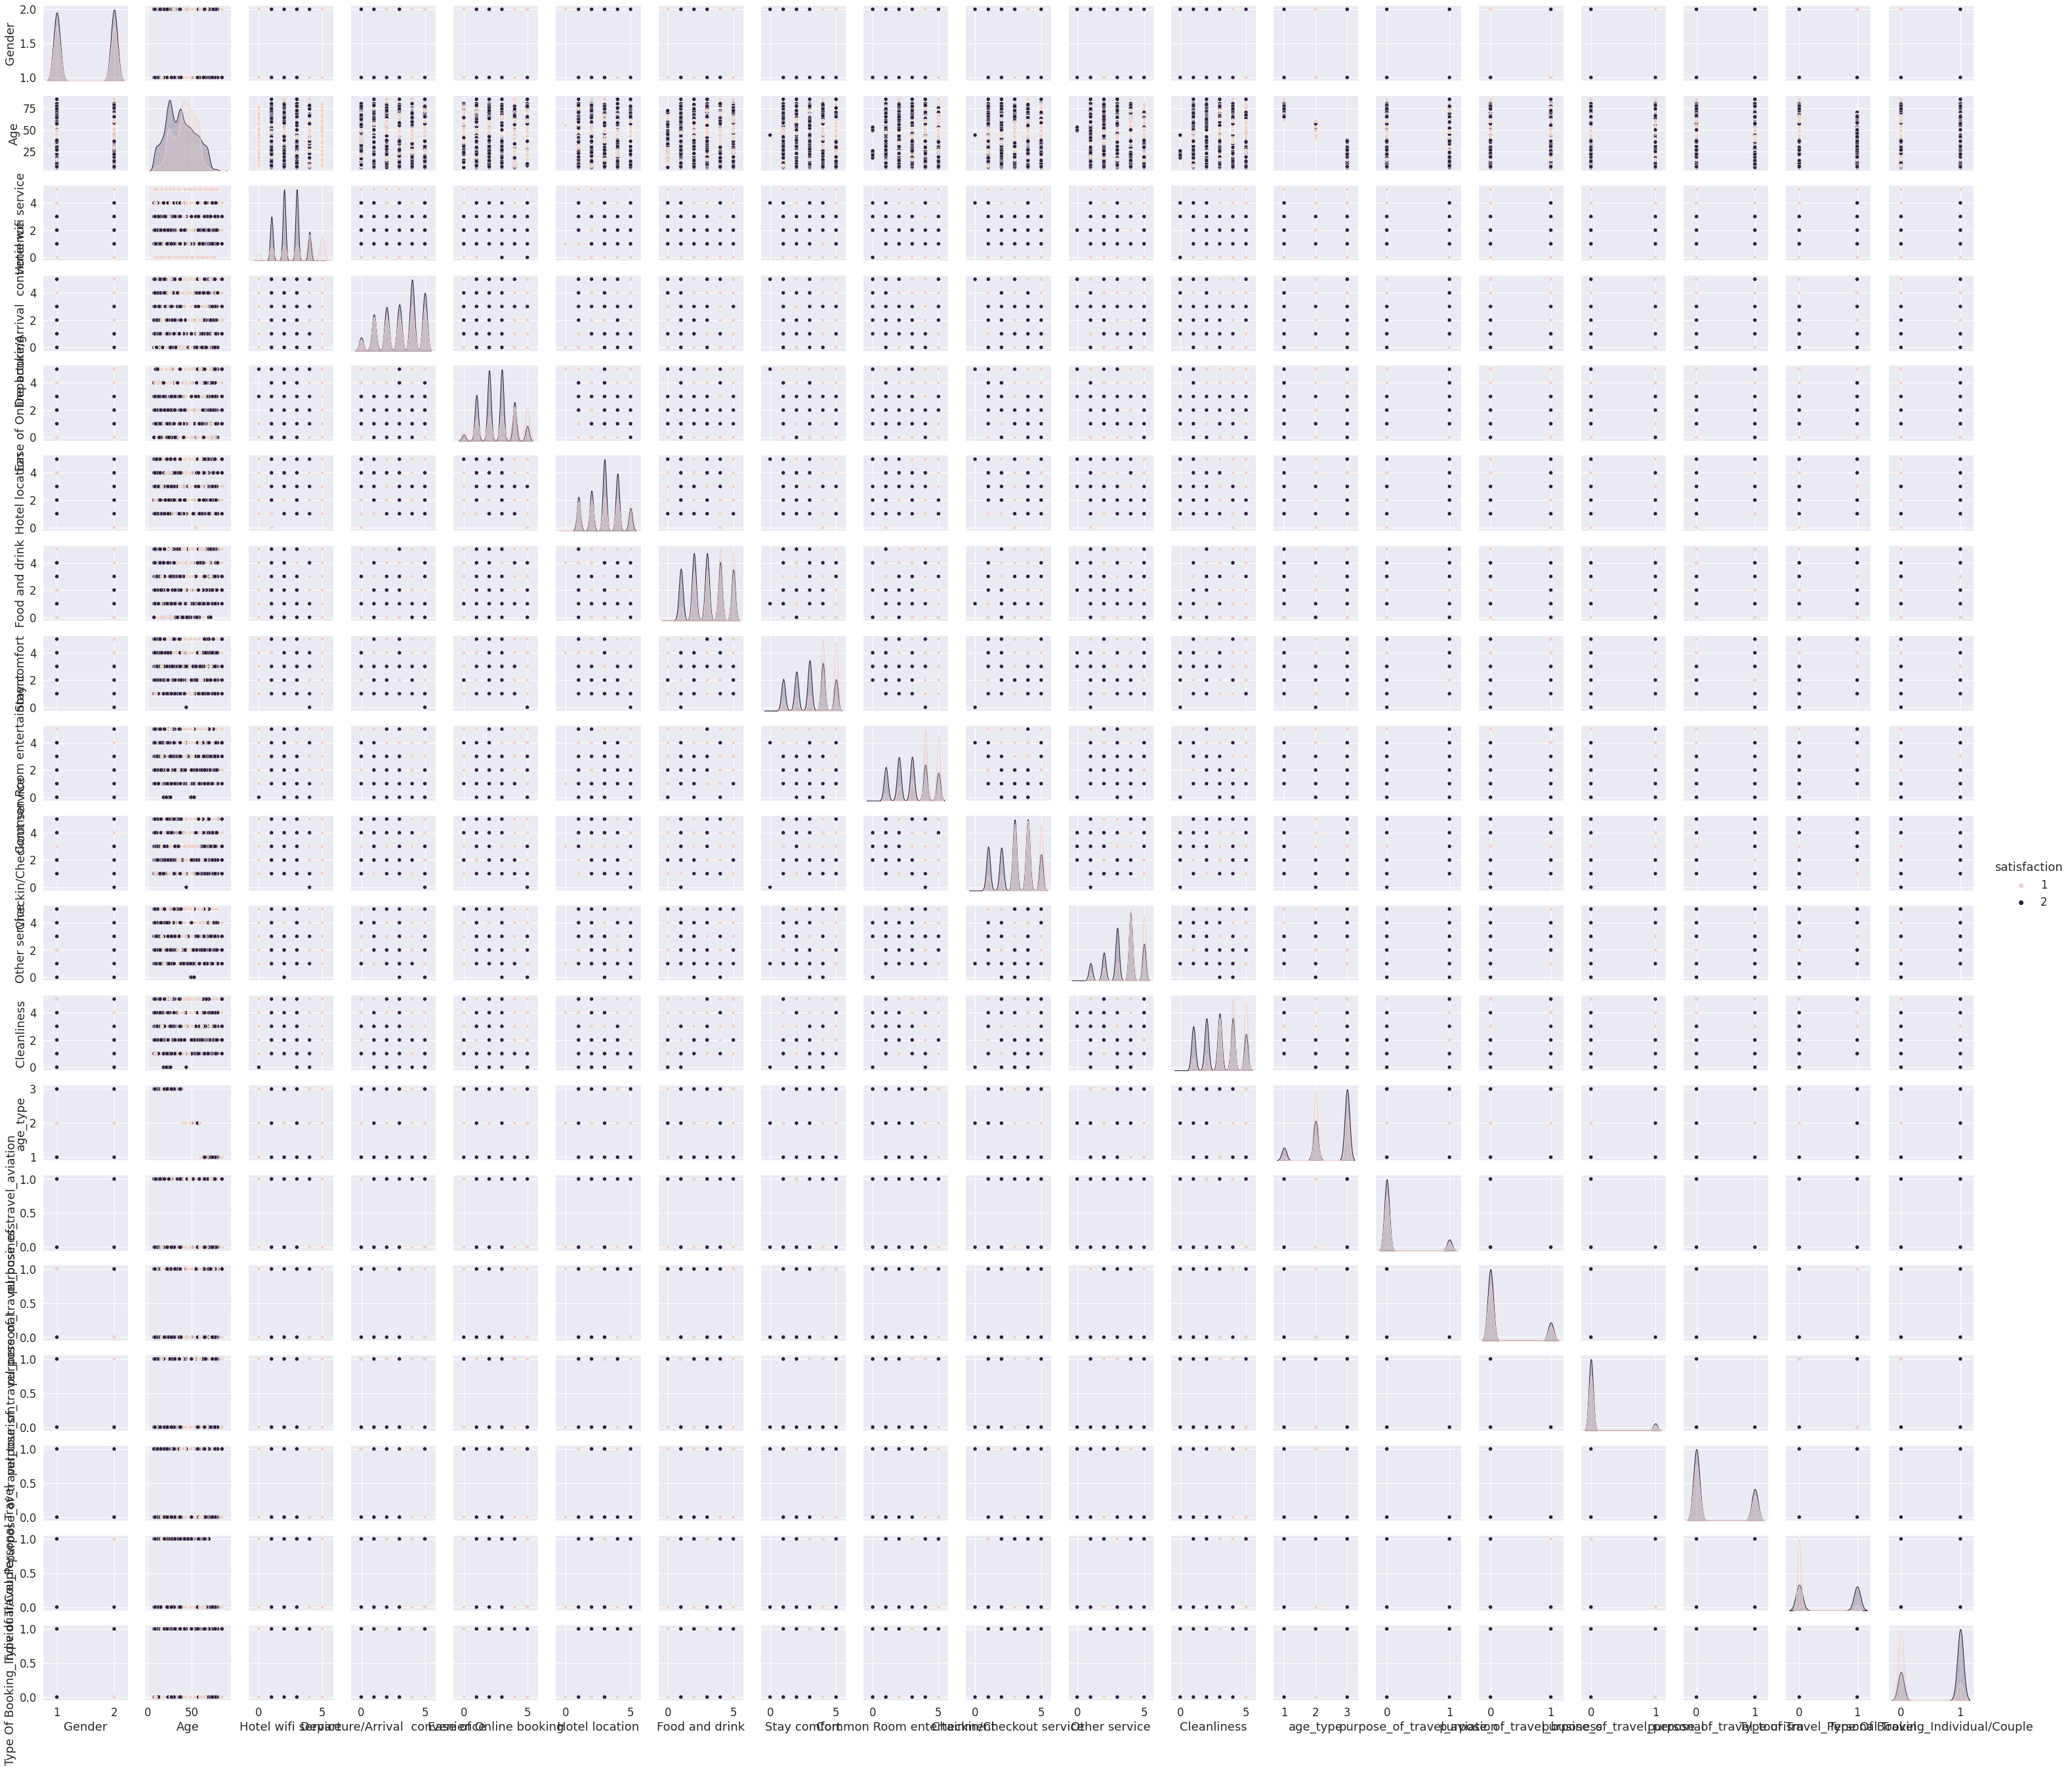

In [237]:
sns.pairplot(data=df,hue='satisfaction')